In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from ast import literal_eval

In [10]:
def get_results(exp, path):
    all_cols = cols = [ 'gain', 'permutation_train', 'permutation_test',
       'shap_train', 'shap_test']
    our_cols = [ 'gain', 'permutation_train', 'permutation_test']
    cols = our_cols if exp.startswith('Ours') else all_cols
    df = pd.read_csv(path, converters = {col: literal_eval for col in cols})
    results = pd.DataFrame()
    for col in cols:
        results[col] = pd.Series(df.loc[0,col])
    return results

paths = {
    'Lgbm' :"results/experiments_results/lgbm/lgbm_vanilla.csv",
    'Catboost' :"results/experiments_results/catboost/catboost_vanilla.csv",
    "Ours_kfold" :"results/experiments_results/ours/ours_Kfold.csv",
     "Ours_Vanilla" :"results/experiments_results/ours/ours_CartVanilla.csv",
    "Sklearn" : "results/experiments_results/sklearn/sklearn_mean_imputing.csv",
    'Xgboost': "results/experiments_results/xgboost/xgboost_mean_imputing.csv"
    
    
}

In [4]:
# df = pd.read_csv("results/experiments_results/ours/ours_CartVanilla.csv", converters = {'gain': literal_eval})

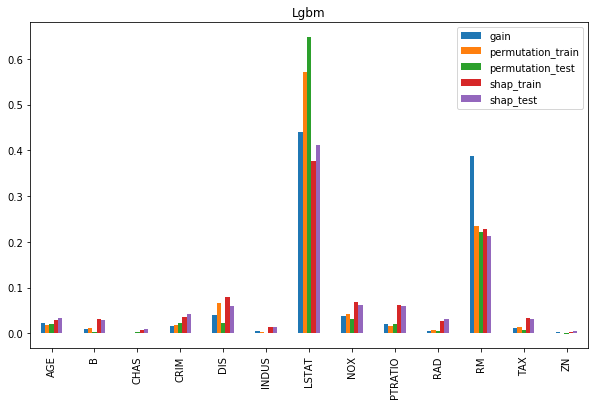

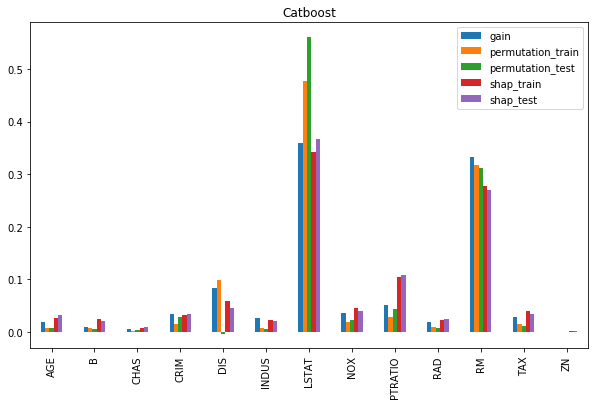

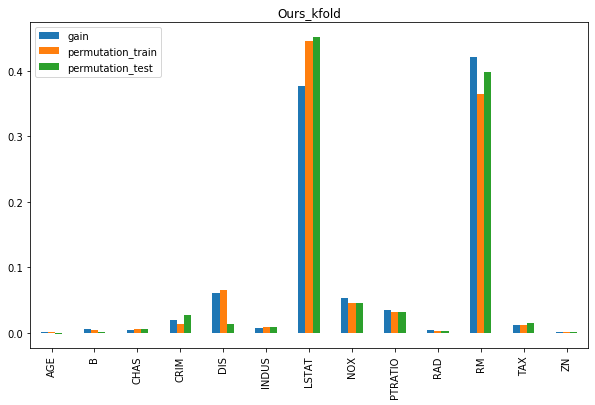

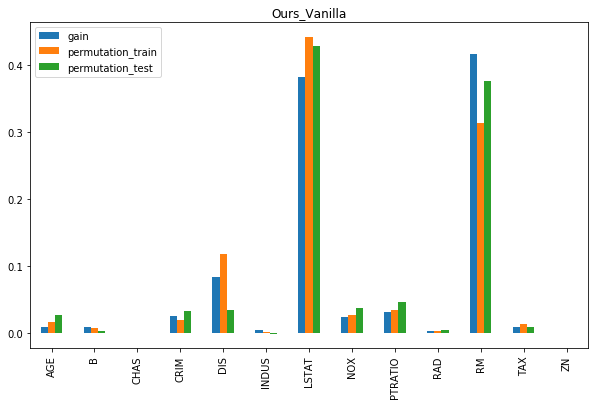

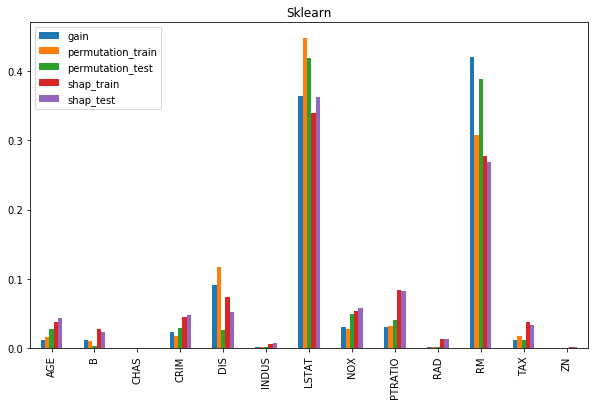

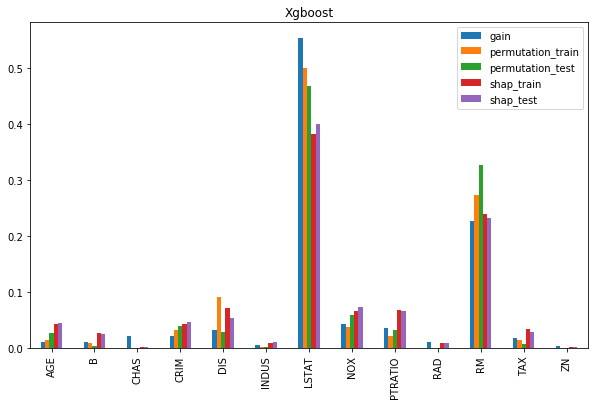

In [11]:
for k, v in paths.items():
    try: 
        results = get_results(k,v)
        results = results.sort_index()
        results.plot(kind = 'bar', figsize = (10,6), title = k)
        plt.plot()
    except:
        pass